In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from utils.transform import Transform
from scipy.special import inv_boxcox
from scipy.stats import boxcox

In [3]:
transform = Transform()

<AxesSubplot: ylabel='Count'>

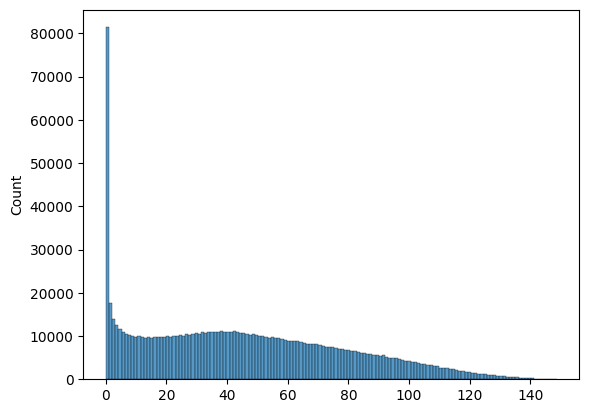

In [4]:
df = pd.read_csv("dataset/training_data.csv")
values = df.value.to_numpy()
sns.histplot(values)

<AxesSubplot: ylabel='Count'>

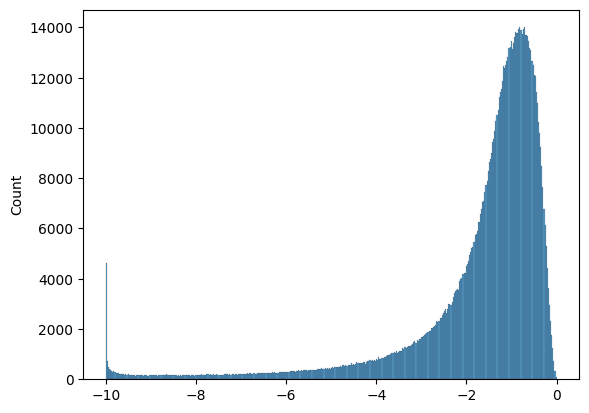

In [5]:
values1 = transform.transform_y(values)
sns.histplot(values1)

<AxesSubplot: ylabel='Count'>

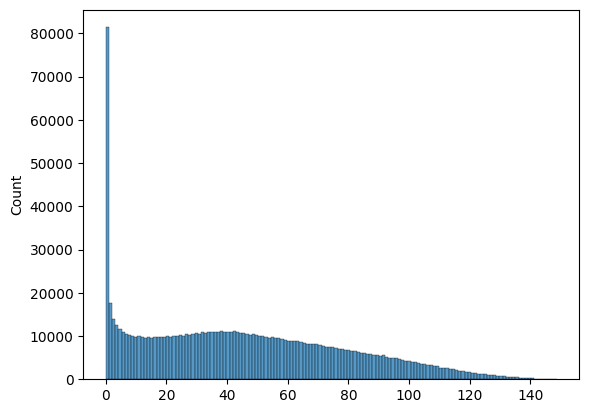

In [6]:
values2 = transform.inverse_transform_y(values1)
sns.histplot(values2)

In [8]:
df = pd.read_csv("dataset/training_data.csv")
df.describe()

,Unnamed: 0,S,K,T,r,sigma,value
count,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000
mean,499999.500000,99.926315,100.004069,2.499034e+00,0.025500,0.774918,45.573667
std,288675.278932,57.727167,28.879139,1.442127e+00,0.014150,0.418456,33.358266
min,0.000000,0.000045,50.000028,5.792107e-07,0.001000,0.050003,0.000000
25%,249999.750000,49.896152,74.969505,1.250575e+00,0.013227,0.412834,17.084922
50%,499999.500000,99.914401,100.021751,2.497919e+00,0.025501,0.774787,42.054971
75%,749999.250000,149.881459,125.014989,3.746985e+00,0.037752,1.137348,69.499670
max,999999.000000,199.999783,149.999585,5.000000e+00,0.050000,1.499999,149.162149
